# Importar librerias y definir funciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [2]:

def filter_for_efficiency_in_each_metric(results_list):

    sorted_by_ndcg_c = sorted(results_list, key=lambda x: x['ndcg_c'], reverse=True)
    sorted_by_map_c = sorted(results_list, key=lambda x: x['map_c'], reverse=True)

    best_ndcg_c = sorted_by_ndcg_c[0]
    best_map_c = sorted_by_map_c[0]

    return {
        'best_ndcg_c': best_ndcg_c,
        'best_map_c': best_map_c
    }

def pareto_filter(results_list, metric, co2_key='co2e'):
    sorted_results = sorted(results_list, key=lambda x: x[co2_key])
    frontier = []
    best_val = -float('inf')
    for r in sorted_results:
        if r[metric] > best_val:
            frontier.append(r)
            best_val = r[metric]

    frontier = sorted(frontier, key=lambda x: x[metric])

    return frontier


# Resultados con métricas -C




## ALS


In [3]:
als_results_df = pd.read_csv('als_model_results_tracker.csv')
als_results_dict = als_results_df.to_dict('records')

In [4]:
als_best_results = filter_for_efficiency_in_each_metric(als_results_dict)
als_map_frontier = pareto_filter(als_results_dict, 'mean_ap')
als_ndcg_frontier = pareto_filter(als_results_dict, 'mean_ndcg')

In [5]:
als_map_frontier.sort(key=lambda x: x['map_c'])
als_ndcg_frontier.sort(key=lambda x: x['ndcg_c'])
print([(result["mean_ap"], result['factors'], result['regularization']) for result in als_map_frontier])
print([(result["mean_ndcg"], result['factors'], result['regularization']) for result in als_ndcg_frontier])

[(0.4334941145191907, 30, 0.1)]
[(0.5760009843647037, 30, 0.1)]


In [6]:
als_best_ndcg_c = als_best_results['best_ndcg_c']
als_best_map_c = als_best_results['best_map_c']
print("Best NDCG-C model.", f"ndcg-c: {als_best_ndcg_c['ndcg_c']}, factors: {als_best_ndcg_c['factors']}, regularization: {als_best_ndcg_c['regularization']}")
print("Best MAP-C model.", f"map-c: {als_best_map_c['map_c']}, factors: {als_best_map_c['factors']}, regularization: {als_best_map_c['regularization']}")


Best NDCG-C model. ndcg-c: 47163.20301347532, factors: 30, regularization: 0.1
Best MAP-C model. map-c: 35849.80407634652, factors: 30, regularization: 0.1


In [7]:

als_max_ndcg_config = als_results_df.loc[als_results_df['mean_ndcg'].idxmax()].to_dict()


als_max_map_config = als_results_df.loc[als_results_df['mean_ap'].idxmax()].to_dict()

als_ordered_ndcg_c = sorted(als_results_dict, key=lambda x: x['ndcg_c'], reverse=True)
als_ordered_map_c = sorted(als_results_dict, key=lambda x: x['map_c'], reverse=True)

print( f"NDCG: {als_max_ndcg_config['mean_ndcg']:.4f}, Factors: {als_max_ndcg_config['factors']}, Reg: {als_max_ndcg_config['regularization']}")
print( f"MAP: {als_max_map_config['mean_ap']:.4f}, Factors: {als_max_map_config['factors']}, Reg: {als_max_map_config['regularization']}")

NDCG: 0.5760, Factors: 30.0, Reg: 0.1
MAP: 0.4335, Factors: 30.0, Reg: 0.1


In [8]:

als_ndcg_correlation = als_results_df['mean_ndcg'].corr(als_results_df['ndcg_c'])
als_map_correlation = als_results_df['mean_ap'].corr(als_results_df['map_c'])

als_co2e_ndcg_correlation = als_results_df['co2e'].corr(als_results_df['ndcg_c'])
als_co2e_map_correlation = als_results_df['co2e'].corr(als_results_df['map_c'])

als_ndcg_map_c_correlation = als_results_df['ndcg_c'].corr(als_results_df['map_c'])


print(f"Correlation (NDCG vs NDCG-C): {als_ndcg_correlation:.4f}")
print(f"Correlation (CO2e vs NDCG-C): {als_co2e_ndcg_correlation:.4f}")
print(f"Correlation (MAP vs MAP-C): {als_map_correlation:.4f}")
print(f"Correlation (CO2e vs MAP-C): {als_co2e_map_correlation:.4f}")
print(f"Correlation (NDCG-C vs MAP-C): {als_ndcg_map_c_correlation:.4f}")


Correlation (NDCG vs NDCG-C): 0.7096
Correlation (CO2e vs NDCG-C): -0.9270
Correlation (MAP vs MAP-C): 0.7278
Correlation (CO2e vs MAP-C): -0.9263
Correlation (NDCG-C vs MAP-C): 1.0000


In [9]:
als_results_df

,factors,regularization,mean_ap,mean_ndcg,mean_diversity,mean_novelty,co2e,map_c,ndcg_c,time
0,30,0.0010,0.432095,0.575781,8.568400,9.406013,0.004188,9727.029731,12835.351227,0.571645
1,30,0.0100,0.432375,0.575877,8.609473,9.403029,0.001904,21411.160543,28238.878183,0.232262
2,30,0.1000,0.433494,0.576001,8.577012,9.401597,0.001140,35849.804076,47163.203013,0.159207
3,50,0.0010,0.427032,0.570437,8.767638,9.518700,0.001987,20246.366824,26783.501644,0.215291
4,50,0.0100,0.426798,0.570616,8.791322,9.509938,0.002237,17973.033054,23798.014204,0.212931
5,50,0.1000,0.429883,0.573961,8.751408,9.515384,0.002244,18056.510211,23875.566681,0.245150
6,100,0.0010,0.402720,0.544267,8.854422,9.737009,0.003191,11843.922875,15855.855600,0.292148
7,100,0.0100,0.403938,0.544674,8.871315,9.731990,0.003304,11476.650535,15327.139828,0.290142
8,100,0.1000,0.401798,0.544637,8.881418,9.728873,0.003275,11514.039015,15463.213709,0.310045
9,30,0.0001,0.431813,0.574429,8.566744,9.402349,0.001683,24185.291939,31855.639174,0.256774


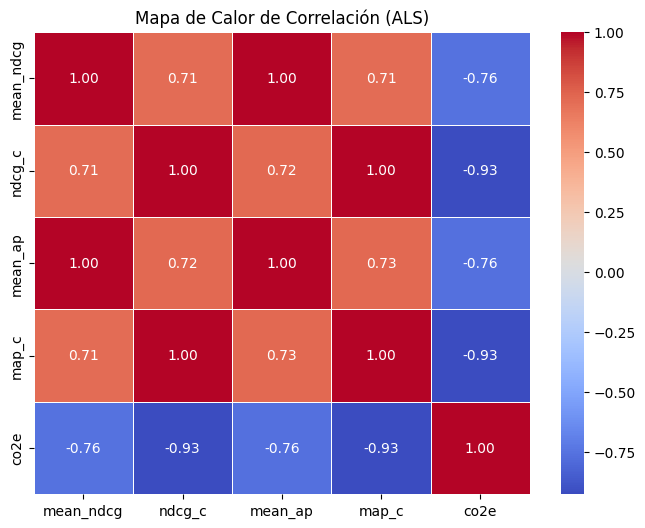

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df_als = als_results_df[['mean_ndcg', 'ndcg_c', 'mean_ap', 'map_c', 'co2e']]
correlation_matrix_als = corr_df_als.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_als,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5
)
plt.title('Mapa de Calor de Correlación (ALS)')
plt.show()

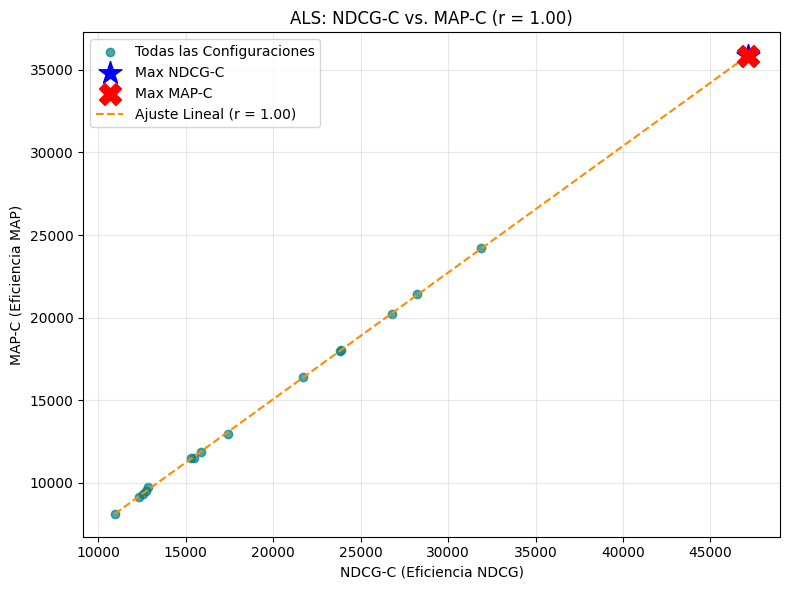

In [ ]:
import numpy as np


plt.figure(figsize=(8, 6))

plt.scatter(
    als_results_df['ndcg_c'],
    als_results_df['map_c'],
    color='teal',
    alpha=0.7,
    label='Todas las Configuraciones'
)

plt.scatter(
    als_best_ndcg_c['ndcg_c'],
    als_best_ndcg_c['map_c'],
    color='blue',
    marker='*',
    s=300,
    zorder=5,
    label='Max NDCG-C'
)

plt.scatter(
    als_best_map_c['ndcg_c'],
    als_best_map_c['map_c'],
    color='red',
    marker='X',
    s=250,
    zorder=5,
    label='Max MAP-C'
)


r_als = als_results_df['ndcg_c'].corr(als_results_df['map_c'])
m_als, b_als = np.polyfit(als_results_df['ndcg_c'], als_results_df['map_c'], 1)
x_fit_als = np.linspace(als_results_df['ndcg_c'].min(), als_results_df['ndcg_c'].max(), 100)

plt.plot(
    x_fit_als,
    m_als * x_fit_als + b_als,
    color='darkorange',
    linestyle='--',
    label=f'Ajuste Lineal (r = {r_als:.2f})'
)

plt.xlabel("NDCG-C (Eficiencia NDCG)")
plt.ylabel("MAP-C (Eficiencia MAP)")
plt.title(f"ALS: NDCG-C vs. MAP-C (r = {r_als:.2f})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### NDCG

/tmp/ipython-input-2352885591.py:23: RankWarning: Polyfit may be poorly conditioned
  m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)


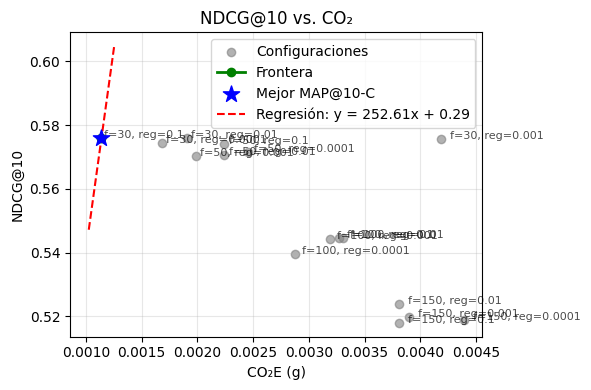

NDCG Frontier Linear Regression:
Slope (m): 252.6089
Intercept (b): 0.2880


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in als_results_dict],
    [r['mean_ndcg'] for r in als_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in als_ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in als_ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)

plt.scatter(
    als_best_map_c['co2e'],
    als_best_map_c['mean_ndcg'],
    color='blue', marker='*', s=150, zorder=5, label='Mejor MAP@10-C'
)

m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')


for r in als_results_dict:
    label = f"f={r['factors']}, reg={r['regularization']}"
    plt.text(r['co2e']*1.02, r['mean_ndcg'], label, fontsize=8, alpha=0.7)

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("NDCG@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("NDCG Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

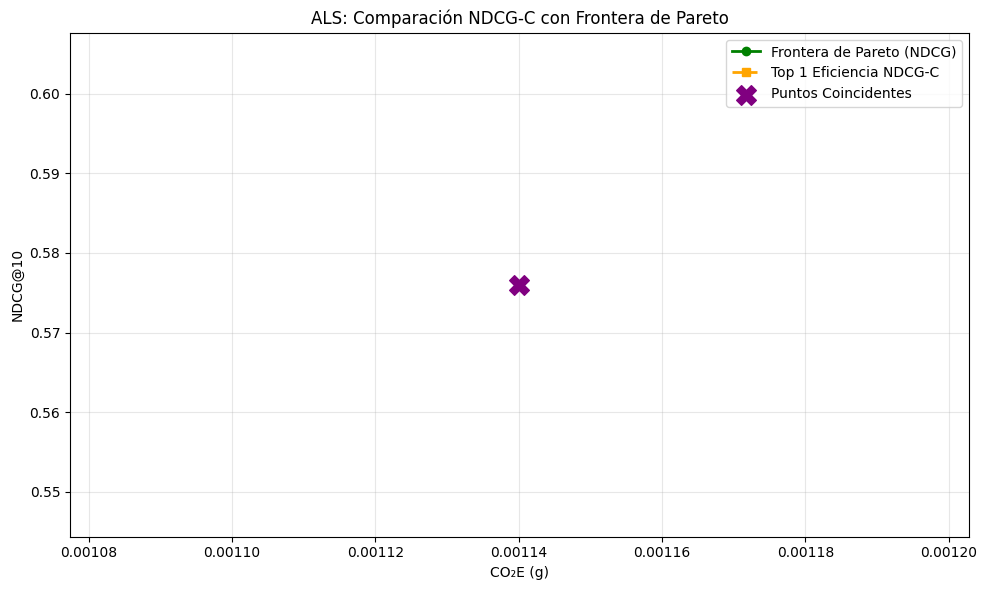

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

co2e_ndcg_als = [r['co2e'] for r in als_ndcg_frontier]
mean_ndcg_als = [r['mean_ndcg'] for r in als_ndcg_frontier]

plt.plot(
    co2e_ndcg_als,
    mean_ndcg_als,
    color='green', marker='o', linewidth=2, label='Frontera de Pareto (NDCG)'
)

frontier_len_als = len(als_ndcg_frontier)
num_points_to_show =  frontier_len_als

plt.plot(
    [r["co2e"] for r in als_ordered_ndcg_c][:num_points_to_show],
    [r["mean_ndcg"] for r in als_ordered_ndcg_c][:num_points_to_show],
    color='orange', marker='s', linewidth=2, linestyle='--', label=f'Top {num_points_to_show} Eficiencia NDCG-C'
)

# 3. Identificar y Trazar Puntos Coincidentes
frontier_points_set_als = set((r['co2e'], r['mean_ndcg']) for r in als_ndcg_frontier)
ordered_efficiency_points_set_als = set((r['co2e'], r['mean_ndcg']) for r in als_ordered_ndcg_c[:num_points_to_show])

coincident_points_als = frontier_points_set_als.intersection(ordered_efficiency_points_set_als)

if coincident_points_als:
    coincident_co2e_als = [p[0] for p in coincident_points_als]
    coincident_mean_ndcg_als = [p[1] for p in coincident_points_als]
    plt.scatter(coincident_co2e_als, coincident_mean_ndcg_als, color='purple', marker='X', s=200, zorder=6, label='Puntos Coincidentes')

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("ALS: Comparación NDCG-C con Frontera de Pareto")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### MAP

/tmp/ipython-input-1594741025.py:24: RankWarning: Polyfit may be poorly conditioned
  m_map, b_map = np.polyfit(co2e_map, mean_ap_map, 1)


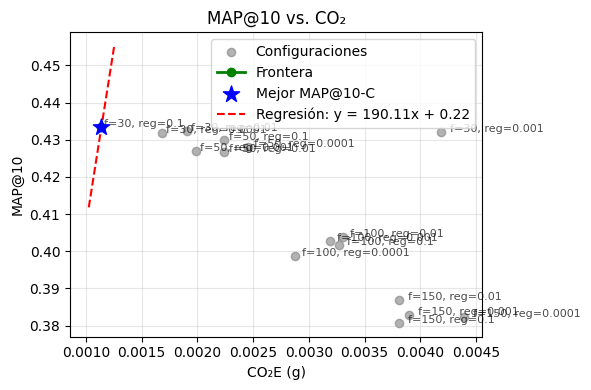

MAP Frontier Linear Regression:
Slope (m): 190.1116
Intercept (b): 0.2167


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in als_results_dict],
    [r['mean_ap'] for r in als_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_map = [r['co2e'] for r in als_map_frontier]
mean_ap_map = [r['mean_ap'] for r in als_map_frontier]


plt.plot(
    co2e_map,
    mean_ap_map,
    color='green', marker='o', linewidth=2, label='Frontera'
)

plt.scatter(
    als_best_map_c['co2e'],
    als_best_map_c['mean_ap'],
    color='blue', marker='*', s=150, zorder=5, label='Mejor MAP@10-C'
)

m_map, b_map = np.polyfit(co2e_map, mean_ap_map, 1)
x_range_map = np.array([min(co2e_map) * 0.9, max(co2e_map) * 1.1])
plt.plot(x_range_map, m_map * x_range_map + b_map, color='red', linestyle='--', label=f'Regresión: y = {m_map:.2f}x + {b_map:.2f}')


for r in als_results_dict:
    label = f"f={r['factors']}, reg={r['regularization']}"
    plt.text(r['co2e']*1.02, r['mean_ap'], label, fontsize=8, alpha=0.7)

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("MAP@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("MAP Frontier Linear Regression:")
print(f"Slope (m): {m_map:.4f}")
print(f"Intercept (b): {b_map:.4f}")

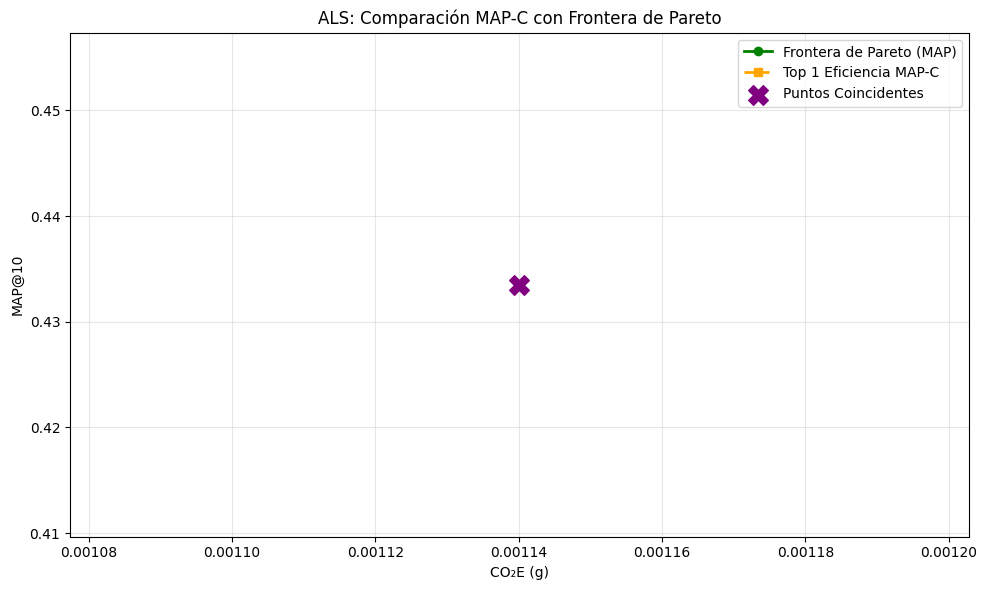

In [ ]:

plt.figure(figsize=(10,6))

co2e_map_als = [r['co2e'] for r in als_map_frontier]
mean_map_als = [r['mean_ap'] for r in als_map_frontier]

plt.plot(
    co2e_map_als,
    mean_map_als,
    color='green', marker='o', linewidth=2, label='Frontera de Pareto (MAP)'
)

frontier_len_map_als = len(als_map_frontier)
num_points_to_show_map =  frontier_len_map_als

plt.plot(
    [r["co2e"] for r in als_ordered_map_c][:num_points_to_show_map],
    [r["mean_ap"] for r in als_ordered_map_c][:num_points_to_show_map],
    color='orange', marker='s', linewidth=2, linestyle='--', label=f'Top {num_points_to_show_map} Eficiencia MAP-C'
)

frontier_points_set_map_als = set((r['co2e'], r['mean_ap']) for r in als_map_frontier)
ordered_efficiency_points_set_map_als = set((r['co2e'], r['mean_ap']) for r in als_ordered_map_c[:num_points_to_show_map])

coincident_points_map_als = frontier_points_set_map_als.intersection(ordered_efficiency_points_set_map_als)

if coincident_points_map_als:
    coincident_co2e_map_als = [p[0] for p in coincident_points_map_als]
    coincident_mean_map_als = [p[1] for p in coincident_points_map_als]
    plt.scatter(coincident_co2e_map_als, coincident_mean_map_als, color='purple', marker='X', s=200, zorder=6, label='Puntos Coincidentes')

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("ALS: Comparación MAP-C con Frontera de Pareto")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## DeepFM

In [18]:
df_deepfm_results = pd.read_csv('deepfm_results_tracker.csv')
df_deepfm_results.rename(columns={'map': 'mean_ap', 'ndcg': 'mean_ndcg'}, inplace=True)
deepfm_results_dict = df_deepfm_results.to_dict(orient='records')

In [19]:
deepfm_best_results = filter_for_efficiency_in_each_metric(deepfm_results_dict)
deepfm_map_frontier = pareto_filter(deepfm_results_dict, 'mean_ap')
deepfm_ndcg_frontier = pareto_filter(deepfm_results_dict, 'mean_ndcg')

In [22]:
deepfm_map_frontier.sort(key=lambda x: x['mean_ap'])
deepfm_ndcg_frontier.sort(key=lambda x: x['mean_ndcg'])
print([(result["mean_ap"], result["co2e"], result['embedding_size'], result['batch_size'], result["learning_rate"]) for result in deepfm_map_frontier])
print([(result["mean_ndcg"], result["co2e"], result['embedding_size'], result['batch_size'], result["learning_rate"]) for result in deepfm_ndcg_frontier])

[(0.1110011511049382, 0.0643318359090222, '32', 1024.0, 0.0001), (0.1160470988472731, 0.0655384257785513, '64', 1024.0, 0.0001), (0.1272486049072894, 0.1671930024506503, '16', 1024.0, 0.001), (0.1335990947680957, 0.1837795472510912, '8', 1024.0, 0.001)]
[(0.1653835671810826, 0.0643318359090222, '32', 1024.0, 0.0001), (0.1708384001643887, 0.0655384257785513, '64', 1024.0, 0.0001), (0.1710050282179391, 0.1009138191559927, '64', 512.0, 0.0001), (0.1874143380390507, 0.1671930024506503, '16', 1024.0, 0.001), (0.1956440109810877, 0.1837795472510912, '8', 1024.0, 0.001)]


In [21]:
deepfm_best_ndcg_c = deepfm_best_results["best_ndcg_c"]
deepfm_best_map_c = deepfm_best_results["best_map_c"]
print("Best NDCG-C model:", f"ndcg_c={deepfm_best_ndcg_c['ndcg_c']} ,embedding_size={deepfm_best_ndcg_c['embedding_size']}, batch_size={deepfm_best_ndcg_c['batch_size']}, learning_rate={deepfm_best_ndcg_c['learning_rate']}")
print("Best MAP-C model", f"map_c={deepfm_best_ndcg_c['map_c']} ,embedding_size={deepfm_best_map_c['embedding_size']}, batch_size={deepfm_best_map_c['batch_size']}, learning_rate={deepfm_best_map_c['learning_rate']}")


Best NDCG-C model: ndcg_c=202.24351094051173 ,embedding_size=64, batch_size=1024.0, learning_rate=0.0001
Best MAP-C model map_c=139.27434316905425 ,embedding_size=64, batch_size=1024.0, learning_rate=0.0001


In [ ]:
deepfm_ordered_ndcg_c = sorted(deepfm_results_dict, key=lambda x: x['ndcg_c'], reverse=True)
deepfm_ordered_map_c = sorted(deepfm_results_dict, key=lambda x: x['map_c'], reverse=True)

In [ ]:
max_ndcg_config = df_deepfm_results.loc[df_deepfm_results['mean_ndcg'].idxmax()].to_dict()
max_map_config = df_deepfm_results.loc[df_deepfm_results['mean_ap'].idxmax()].to_dict()

### Correlaciones

In [ ]:

ndcg_correlation = df_deepfm_results['mean_ndcg'].corr(df_deepfm_results['ndcg_c'])
co2e_ndcg_correlation = df_deepfm_results['co2e'].corr(df_deepfm_results['ndcg_c'])
map_correlation = df_deepfm_results['mean_ap'].corr(df_deepfm_results['map_c'])
co2e_map_correlation = df_deepfm_results['co2e'].corr(df_deepfm_results['map_c'])

print(f"Correlation (NDCG vs NDCG-C): {ndcg_correlation:.4f}")
print(f"Correlation (CO2e vs NDCG-C): {co2e_ndcg_correlation:.4f}")
print(f"Correlation (MAP vs MAP-C): {map_correlation:.4f}")
print(f"Correlation (CO2e vs MAP-C): {co2e_map_correlation:.4f}")




Correlation (NDCG vs NDCG-C): -0.4441
Correlation (CO2e vs NDCG-C): -0.9235
Correlation (MAP vs MAP-C): -0.2725
Correlation (CO2e vs MAP-C): -0.9196


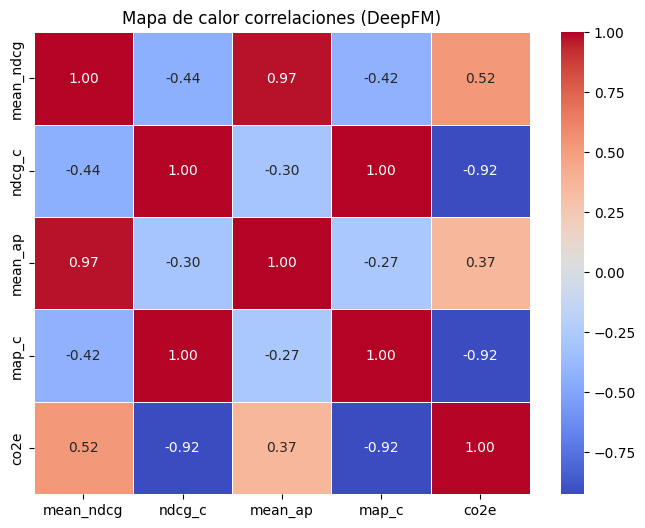

In [ ]:

corr_df = df_deepfm_results[['mean_ndcg', 'ndcg_c', 'mean_ap', 'map_c', 'co2e']]
correlation_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5
)
plt.title('Mapa de calor correlaciones (DeepFM)')
plt.show()

ndcg-c vs map-c


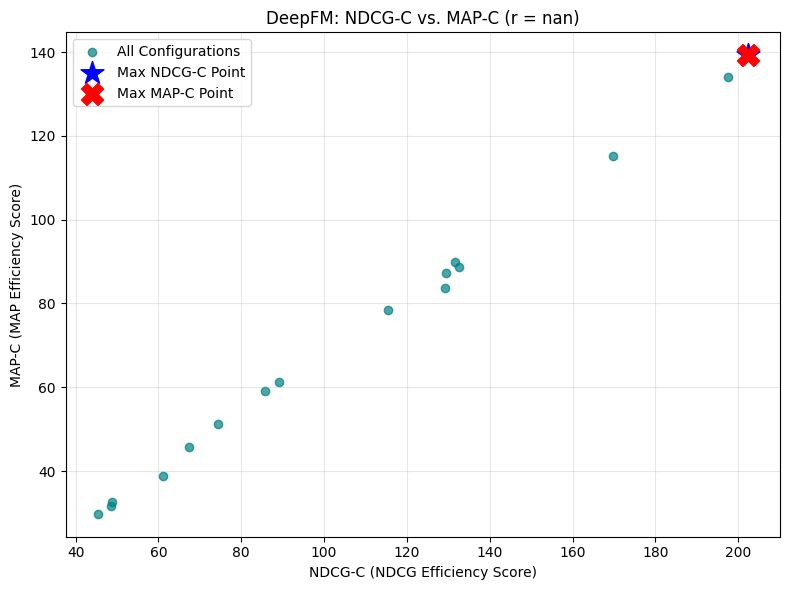

In [ ]:

correlation_coeff = np.corrcoef(
    df_deepfm_results['ndcg_c'],
    df_deepfm_results['map_c']
)[0, 1]

plt.figure(figsize=(8, 6))

plt.scatter(
    df_deepfm_results['ndcg_c'],
    df_deepfm_results['map_c'],
    color='teal',
    alpha=0.7,
    label='All Configurations'
)

plt.scatter(
    deepfm_best_ndcg_c['ndcg_c'],
    deepfm_best_ndcg_c['map_c'],
    color='blue',
    marker='*',
    s=300,
    zorder=5,
    label='Max NDCG-C Point'
)

plt.scatter(
    deepfm_best_map_c['ndcg_c'],
    deepfm_best_map_c['map_c'],
    color='red',
    marker='X',
    s=250,
    zorder=5,
    label='Max MAP-C Point'
)

plt.xlabel("NDCG-C (NDCG Efficiency Score)")
plt.ylabel("MAP-C (MAP Efficiency Score)")
plt.title(f"DeepFM: NDCG-C vs. MAP-C (r = {correlation_coeff:.2f})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Tradeoff

In [ ]:
import pandas as pd

comparison_data_ndcg = [
    {
        'Metric': 'Max NDCG',
        'NDCG': max_ndcg_config['mean_ndcg'],
        'NDCG-C': max_ndcg_config['ndcg_c'],
        'CO2e (g)': max_ndcg_config['co2e'],
        'Embedding Size': max_ndcg_config['embedding_size'],
        'Learning Rate': max_ndcg_config['learning_rate'],
        'Batch Size': max_ndcg_config['batch_size'],

    },
    {
        'Metric': 'Max NDCG-C',
        'NDCG': deepfm_best_ndcg_c['mean_ndcg'],
        'NDCG-C': deepfm_best_ndcg_c['ndcg_c'],
        'CO2e (g)': deepfm_best_ndcg_c['co2e'],
        'Embedding Size': deepfm_best_ndcg_c['embedding_size'],
        'Learning Rate': deepfm_best_ndcg_c['learning_rate'],
        'Batch Size': deepfm_best_ndcg_c['batch_size'],

    }
]
df_ndcg_comparison = pd.DataFrame(comparison_data_ndcg)


print(df_ndcg_comparison[[
    'Metric', 'NDCG', 'NDCG-C', 'CO2e (g)',
    'Embedding Size', 'Learning Rate', 'Batch Size'
]].to_markdown(index=False, floatfmt=(".4f", ".4f", ".4f", ".4f", ".0f", ".6f", ".0f")))


comparison_data_map = [
    {
        'Metric': 'Max MAP',
        'MAP': max_map_config['mean_ap'],
        'MAP-C': max_map_config['map_c'],
        'CO2e (g)': max_map_config['co2e'],
        'Embedding Size': max_map_config['embedding_size'],
        'Learning Rate': max_map_config['learning_rate'],
        'Batch Size': max_map_config['batch_size'],
    },
    {
        'Metric': 'Max MAP-C',
        'MAP': deepfm_best_map_c['mean_ap'],
        'MAP-C': deepfm_best_map_c['map_c'],
        'CO2e (g)': deepfm_best_map_c['co2e'],
        'Embedding Size': deepfm_best_map_c['embedding_size'],
        'Learning Rate': deepfm_best_map_c['learning_rate'],
        'Batch Size': deepfm_best_map_c['batch_size'],
    }
]
df_map_comparison = pd.DataFrame(comparison_data_map)

print(df_map_comparison[[
    'Metric', 'MAP', 'MAP-C', 'CO2e (g)',
    'Embedding Size', 'Learning Rate', 'Batch Size'
]].to_markdown(index=False, floatfmt=(".4f", ".4f", ".4f", ".4f", ".0f", ".6f", ".0f")))


| Metric     |   NDCG |   NDCG-C |   CO2e (g) |   Embedding Size |   Learning Rate |   Batch Size |
|:-----------|-------:|---------:|-----------:|-----------------:|----------------:|-------------:|
| Max NDCG   | 0.1956 |  85.6204 |     0.1838 |                8 |        0.001000 |         1024 |
| Max NDCG-C | 0.1708 | 202.2435 |     0.0655 |               64 |        0.000100 |         1024 |
| Metric    |    MAP |    MAP-C |   CO2e (g) |   Embedding Size |   Learning Rate |   Batch Size |
|:----------|-------:|---------:|-----------:|-----------------:|----------------:|-------------:|
| Max MAP   | 0.1336 |  59.2178 |     0.1838 |                8 |        0.001000 |         1024 |
| Max MAP-C | 0.1160 | 139.2743 |     0.0655 |               64 |        0.000100 |         1024 |


### NDCG

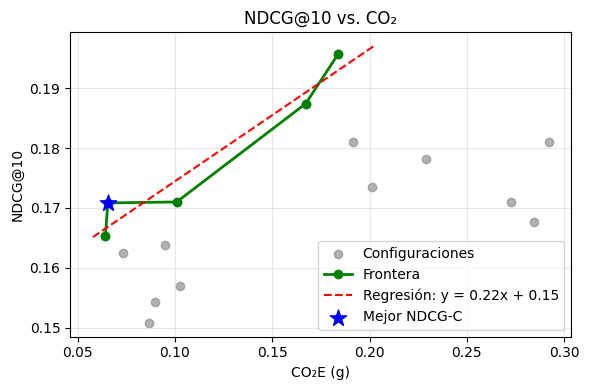

NDCG Frontier Linear Regression:
Slope (m): 0.2209
Intercept (b): 0.1524


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in deepfm_results_dict],
    [r['mean_ndcg'] for r in deepfm_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in deepfm_ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in deepfm_ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)


m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')


plt.scatter(
    deepfm_best_ndcg_c['co2e'],
    deepfm_best_ndcg_c['mean_ndcg'],
    color='blue', marker='*', s=150, zorder=5, label='Mejor NDCG-C'
)

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("NDCG@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("NDCG Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

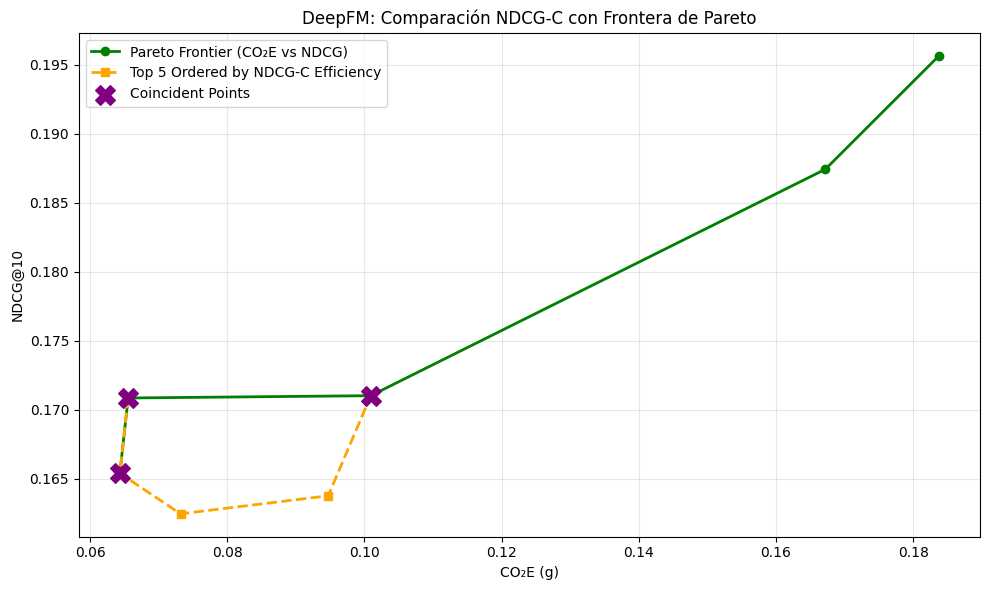

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

co2e_ndcg = [r['co2e'] for r in deepfm_ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in deepfm_ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Pareto Frontier (CO₂E vs NDCG)'
)

K = len(deepfm_ndcg_frontier)

plt.plot(
    [r["co2e"] for r in deepfm_ordered_ndcg_c][:K],
    [r["mean_ndcg"] for r in deepfm_ordered_ndcg_c][:K],
    color='orange', marker='s', linestyle='--', linewidth=2, label=f'Top {K} Ordered by NDCG-C Efficiency'
)

frontier_points_set = set((r['co2e'], r['mean_ndcg']) for r in deepfm_ndcg_frontier)
ordered_efficiency_points_set = set((r['co2e'], r['mean_ndcg']) for r in deepfm_ordered_ndcg_c[:K])

coincident_points = frontier_points_set.intersection(ordered_efficiency_points_set)

if coincident_points:
    coincident_co2e = [p[0] for p in coincident_points]
    coincident_mean_ndcg = [p[1] for p in coincident_points]
    plt.scatter(coincident_co2e, coincident_mean_ndcg, color='purple', marker='X', s=200, zorder=6, label='Coincident Points')

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title(f"DeepFM: Comparación NDCG-C con Frontera de Pareto")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### MAP

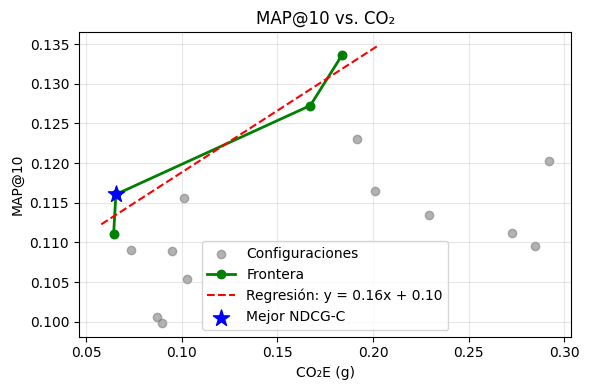

MAP Frontier Linear Regression:
Slope (m): 0.1557
Intercept (b): 0.1033


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in deepfm_results_dict],
    [r['mean_ap'] for r in deepfm_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_map = [r['co2e'] for r in deepfm_map_frontier]
mean_ap_map = [r['mean_ap'] for r in deepfm_map_frontier]


plt.plot(
    co2e_map,
    mean_ap_map,
    color='green', marker='o', linewidth=2, label='Frontera'
)

m_map, b_map = np.polyfit(co2e_map, mean_ap_map, 1)
x_range_map = np.array([min(co2e_map) * 0.9, max(co2e_map) * 1.1])
plt.plot(x_range_map, m_map * x_range_map + b_map, color='red', linestyle='--', label=f'Regresión: y = {m_map:.2f}x + {b_map:.2f}')

plt.scatter(
    deepfm_best_map_c['co2e'],
    deepfm_best_map_c['mean_ap'],
    color='blue', marker='*', s=150, zorder=5, label='Mejor NDCG-C'
)

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("MAP@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("MAP Frontier Linear Regression:")
print(f"Slope (m): {m_map:.4f}")
print(f"Intercept (b): {b_map:.4f}")

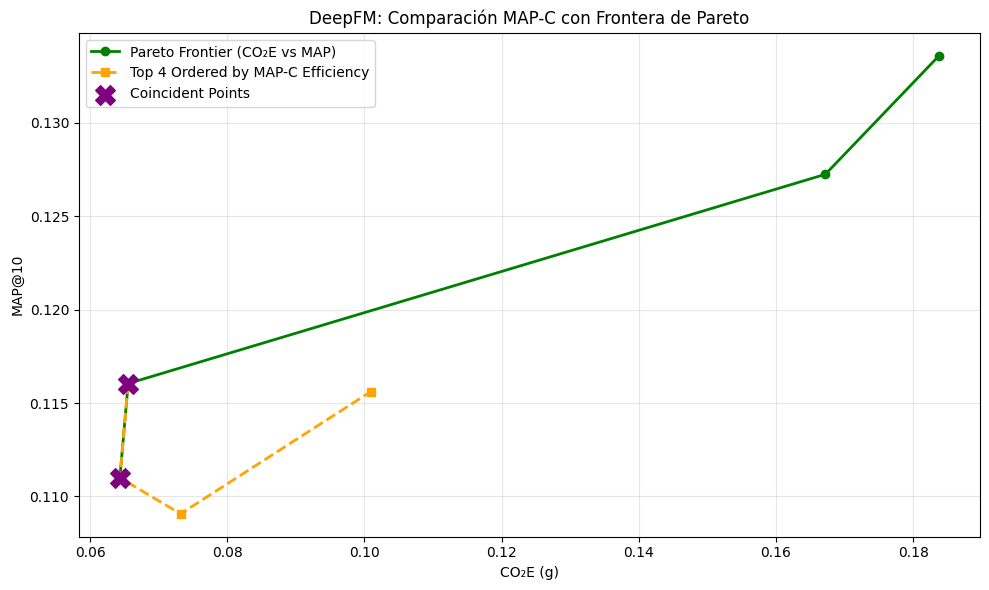

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

co2e_map = [r['co2e'] for r in deepfm_map_frontier]
mean_ap_map = [r['mean_ap'] for r in deepfm_map_frontier]

plt.plot(
    co2e_map,
    mean_ap_map,
    color='green', marker='o', linewidth=2, label='Pareto Frontier (CO₂E vs MAP)'
)

K = len(deepfm_map_frontier)

plt.plot(
    [r["co2e"] for r in deepfm_ordered_map_c][:K],
    [r["mean_ap"] for r in deepfm_ordered_map_c][:K],
    color='orange', marker='s', linestyle='--', linewidth=2, label=f'Top {K} Ordered by MAP-C Efficiency'
)

frontier_points_set = set((r['co2e'], r['mean_ap']) for r in deepfm_map_frontier)
ordered_efficiency_points_set = set((r['co2e'], r['mean_ap']) for r in deepfm_ordered_map_c[:K])

coincident_points = frontier_points_set.intersection(ordered_efficiency_points_set)

if coincident_points:
    coincident_co2e = [p[0] for p in coincident_points]
    coincident_mean_ap = [p[1] for p in coincident_points]
    plt.scatter(coincident_co2e, coincident_mean_ap, color='purple', marker='X', s=200, zorder=6, label='Coincident Points')

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title(f"DeepFM: Comparación MAP-C con Frontera de Pareto")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Análisis

La correlación positiva entre las métricas de efficiencia y de ranking nos da más evidencia de que la posible redundancia de las métricas de eficiencia. Sin embargo, con la correlación respecto a las emisiones de co2e podemos observar el mismo fenomeno que con los resultados de multivae, donde los modelos que tienen métricas más altas tienden a ser los más eficientes en términos de emisiones de carbono.

## MultiVAE

In [23]:
df_multivae_results = pd.read_csv('multivae_results_tracker.csv')
df_multivae_results.rename(columns={'map': 'mean_ap', 'ndcg': 'mean_ndcg'}, inplace=True)
multivae_results_dict = df_multivae_results.to_dict(orient='records')


In [24]:
multivae_best_results = filter_for_efficiency_in_each_metric(multivae_results_dict)
multivae_map_frontier = pareto_filter(multivae_results_dict, 'mean_ap')
multivae_ndcg_frontier = pareto_filter(multivae_results_dict, 'mean_ndcg')

In [25]:
multivae_map_frontier.sort(key=lambda x: x['mean_ap'])
multivae_ndcg_frontier.sort(key=lambda x: x['mean_ndcg'])
multivae_map_frontier_df = pd.DataFrame(multivae_map_frontier)
multivae_ndcg_frontier_df = pd.DataFrame(multivae_ndcg_frontier)
multivae_map_frontier_df

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
0,50,400,0.000001,512,0.2,0.0000,20,0.040764,0.024440,9.696257,11.556294,1626.193001,-1408.227268,0.000984,7.492807
1,50,400,0.000001,1024,0.5,0.0001,10,0.062892,0.047781,7.604836,11.948353,85.497371,21.282314,0.044590,3.899096
2,50,400,0.000001,1024,0.8,0.0001,10,0.083693,0.069871,8.675886,11.287400,129.749497,69.537914,0.045413,3.933617
3,50,400,0.000010,1024,0.8,0.0000,10,0.118577,0.097337,10.210997,12.787549,202.960207,127.749642,0.046220,3.981310


In [26]:
multivae_ndcg_frontier_df

,hidden_dim,intermediate_dim,learning_rate,batch_size,dropout_enc,weight_decay,epochs,mean_ap,mean_ndcg,diversity,novelty,map_c,ndcg_c,co2e,time
0,50,400,0.000001,512,0.2,0.0000,20,0.040764,0.024440,9.696257,11.556294,1626.193001,-1408.227268,0.000984,7.492807
1,50,400,0.000001,1024,0.5,0.0001,10,0.062892,0.047781,7.604836,11.948353,85.497371,21.282314,0.044590,3.899096
2,50,400,0.000001,1024,0.8,0.0001,10,0.083693,0.069871,8.675886,11.287400,129.749497,69.537914,0.045413,3.933617
3,50,400,0.000010,1024,0.8,0.0000,10,0.118577,0.097337,10.210997,12.787549,202.960207,127.749642,0.046220,3.981310


In [31]:
multivae_map_frontier

[{'hidden_dim': 50,
  'intermediate_dim': 400,
  'learning_rate': 1e-06,
  'batch_size': 512,
  'dropout_enc': 0.2,
  'weight_decay': 0.0,
  'epochs': 20,
  'mean_ap': 0.0407638249387813,
  'mean_ndcg': 0.0244401199808619,
  'diversity': 9.696257038754554,
  'novelty': 11.556294157970289,
  'map_c': 1626.1930005293348,
  'ndcg_c': -1408.227267529524,
  'co2e': 0.0009835817835101,
  'time': 7.492807149887085},
 {'hidden_dim': 50,
  'intermediate_dim': 400,
  'learning_rate': 1e-06,
  'batch_size': 1024,
  'dropout_enc': 0.5,
  'weight_decay': 0.0001,
  'epochs': 10,
  'mean_ap': 0.0628922227920966,
  'mean_ndcg': 0.0477809849787323,
  'diversity': 7.604836038423319,
  'novelty': 11.948352632534917,
  'map_c': 85.49737073700857,
  'ndcg_c': 21.282313516357217,
  'co2e': 0.0445900682589492,
  'time': 3.8990962505340576},
 {'hidden_dim': 50,
  'intermediate_dim': 400,
  'learning_rate': 1e-06,
  'batch_size': 1024,
  'dropout_enc': 0.8,
  'weight_decay': 0.0001,
  'epochs': 10,
  'mean_ap'

In [32]:
multivae_ndcg_frontier

[{'hidden_dim': 50,
  'intermediate_dim': 400,
  'learning_rate': 1e-06,
  'batch_size': 512,
  'dropout_enc': 0.2,
  'weight_decay': 0.0,
  'epochs': 20,
  'mean_ap': 0.0407638249387813,
  'mean_ndcg': 0.0244401199808619,
  'diversity': 9.696257038754554,
  'novelty': 11.556294157970289,
  'map_c': 1626.1930005293348,
  'ndcg_c': -1408.227267529524,
  'co2e': 0.0009835817835101,
  'time': 7.492807149887085},
 {'hidden_dim': 50,
  'intermediate_dim': 400,
  'learning_rate': 1e-06,
  'batch_size': 1024,
  'dropout_enc': 0.5,
  'weight_decay': 0.0001,
  'epochs': 10,
  'mean_ap': 0.0628922227920966,
  'mean_ndcg': 0.0477809849787323,
  'diversity': 7.604836038423319,
  'novelty': 11.948352632534917,
  'map_c': 85.49737073700857,
  'ndcg_c': 21.282313516357217,
  'co2e': 0.0445900682589492,
  'time': 3.8990962505340576},
 {'hidden_dim': 50,
  'intermediate_dim': 400,
  'learning_rate': 1e-06,
  'batch_size': 1024,
  'dropout_enc': 0.8,
  'weight_decay': 0.0001,
  'epochs': 10,
  'mean_ap'

In [27]:
max_ndcg_config = df_multivae_results.loc[df_multivae_results['mean_ndcg'].idxmax()].to_dict()
max_map_config = df_multivae_results.loc[df_multivae_results['mean_ap'].idxmax()].to_dict()

In [30]:
multivae_best_ndcg_c = multivae_best_results["best_ndcg_c"]
multivae_best_map_c = multivae_best_results["best_map_c"]
print("Best NDCG-C model:", f"ndcg_c={multivae_best_ndcg_c['ndcg_c']} ,hidden_dim={multivae_best_ndcg_c['hidden_dim']}, intermediate_dim={multivae_best_ndcg_c['intermediate_dim']}, learning_rate={multivae_best_ndcg_c['learning_rate']}")
print("Best MAP-C model", f"map_c={multivae_best_map_c['map_c']} ,hidden_dim={multivae_best_map_c['hidden_dim']}, intermediate_dim={multivae_best_map_c['intermediate_dim']}, learning_rate={multivae_best_map_c['learning_rate']}")


Best NDCG-C model: ndcg_c=127.7496419578231 ,hidden_dim=50, intermediate_dim=400, learning_rate=1e-05
Best MAP-C model map_c=1626.1930005293348 ,hidden_dim=50, intermediate_dim=400, learning_rate=1e-06


In [ ]:
multivae_ordered_ndcg_c = sorted(multivae_results_dict, key=lambda x: x['ndcg_c'], reverse=True)
multivae_ordered_map_c = sorted(multivae_results_dict, key=lambda x: x['map_c'], reverse=True)

### Correlaciones

In [ ]:


ndcg_correlation = df_multivae_results['mean_ndcg'].corr(df_multivae_results['ndcg_c'])
co2e_ndcg_correlation = df_multivae_results['co2e'].corr(df_multivae_results['ndcg_c'])
map_correlation = df_multivae_results['mean_ap'].corr(df_multivae_results['map_c'])
co2e_map_correlation = df_multivae_results['co2e'].corr(df_multivae_results['map_c'])

print(f"Correlation (NDCG vs NDCG-C): {ndcg_correlation:.4f}")
print(f"Correlation (CO2e vs NDCG-C): {co2e_ndcg_correlation:.4f}")
print(f"Correlation (MAP vs MAP-C): {map_correlation:.4f}")
print(f"Correlation (CO2e vs MAP-C): {co2e_map_correlation:.4f}")


Correlation (NDCG vs NDCG-C): 0.1460
Correlation (CO2e vs NDCG-C): 0.2771
Correlation (MAP vs MAP-C): 0.2119
Correlation (CO2e vs MAP-C): -0.2992


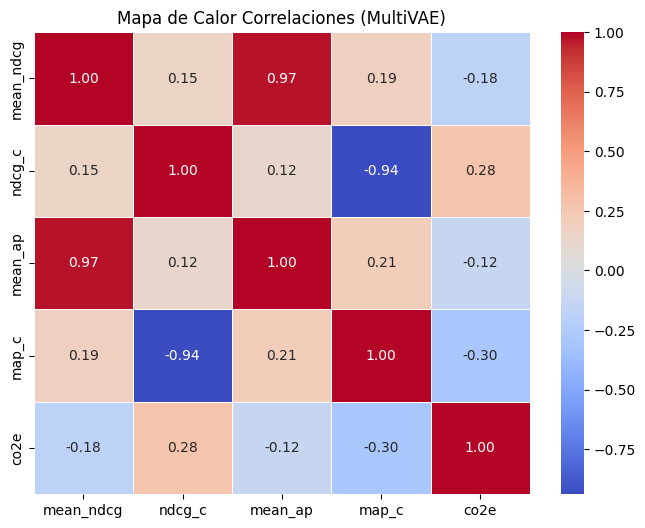

In [ ]:

corr_df = df_multivae_results[['mean_ndcg', 'ndcg_c', 'mean_ap', 'map_c', 'co2e']]
correlation_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5
)
plt.title('Mapa de Calor Correlaciones (MultiVAE)')
plt.show()

#### grafico ndcg-c vs map-c

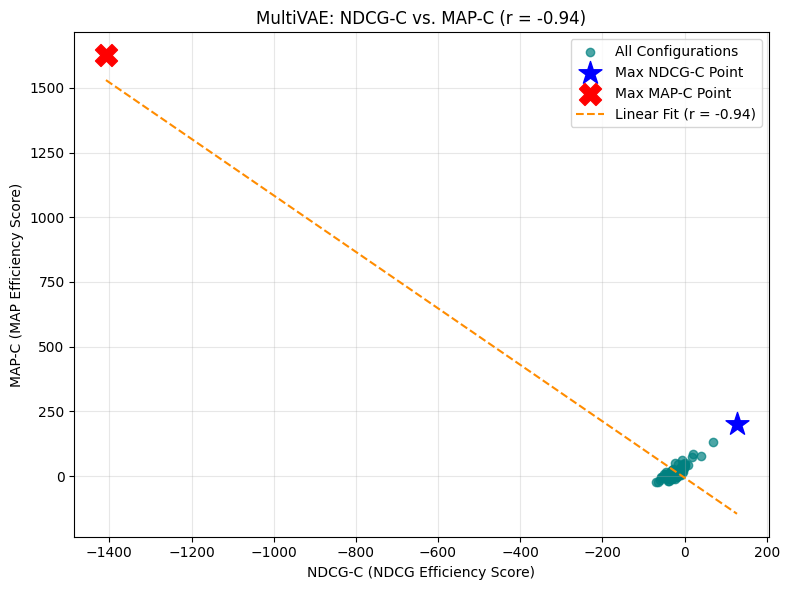

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))


plt.scatter(
    df_multivae_results['ndcg_c'],
    df_multivae_results['map_c'],
    color='teal',
    alpha=0.7,
    label='All Configurations'
)


plt.scatter(
    multivae_best_ndcg_c['ndcg_c'],
    multivae_best_ndcg_c['map_c'],
    color='blue',
    marker='*',
    s=300,
    zorder=5,
    label='Max NDCG-C Point'
)

plt.scatter(
    multivae_best_map_c['ndcg_c'],
    multivae_best_map_c['map_c'],
    color='red',
    marker='X',
    s=250,
    zorder=5,
    label='Max MAP-C Point'
)


m, b = np.polyfit(df_multivae_results['ndcg_c'], df_multivae_results['map_c'], 1)

x_fit = np.linspace(df_multivae_results['ndcg_c'].min(), df_multivae_results['ndcg_c'].max(), 100)

plt.plot(
    x_fit,
    m * x_fit + b,
    color='darkorange',
    linestyle='--',
    label=f'Linear Fit (r = {df_multivae_results["ndcg_c"].corr(df_multivae_results["map_c"]):.2f})'
)

plt.xlabel("NDCG-C (NDCG Efficiency Score)")
plt.ylabel("MAP-C (MAP Efficiency Score)")
plt.title(f"MultiVAE: NDCG-C vs. MAP-C (r = {df_multivae_results['ndcg_c'].corr(df_multivae_results['map_c']):.2f})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Análisis

Existe una alta volatilidad de la métrica, el MAP-C más alto coincide con un ndcg-c muy bajo, ya que la configuración es un poco mejor que random para map y un poco peor que random para ndcg, sin embargo, como tiene tan poco co2e, el valor explota en ambas direcciones. Esto nos da una correlación poco confiable, ya que pareciera que map-c y ndcg-c tienen una correlación negativa perfecta debido a la volatilidad que se observa en un solo caso.

### Correlaciones sin outlier

In [ ]:
outlier_index = df_multivae_results['map_c'].idxmax()

df_filtered = df_multivae_results.drop(outlier_index).reset_index(drop=True)

multivae_best_map_c_filtered = df_filtered.loc[df_filtered['map_c'].idxmax()].to_dict()

multivae_best_ndcg_c_filtered = df_filtered.loc[df_filtered['ndcg_c'].idxmax()].to_dict()

In [ ]:


ndcg_correlation_f = df_filtered['mean_ndcg'].corr(df_filtered['ndcg_c'])
co2e_ndcg_correlation_f = df_filtered['co2e'].corr(df_filtered['ndcg_c'])
map_correlation_f = df_filtered['mean_ap'].corr(df_filtered['map_c'])
co2e_map_correlation_f = df_filtered['co2e'].corr(df_filtered['map_c'])
ndcg_map_c_correlation_f = df_filtered['ndcg_c'].corr(df_filtered['map_c'])

print(f"Correlation (NDCG vs NDCG-C): {ndcg_correlation_f:.4f}")
print(f"Correlation (CO2e vs NDCG-C): {co2e_ndcg_correlation_f:.4f}")
print(f"Correlation (MAP vs MAP-C): {map_correlation_f:.4f}")
print(f"Correlation (CO2e vs MAP-C): {co2e_map_correlation_f:.4f}")
print(f"Correlation (NDCG-C vs MAP-C) - CORE FILTERED: {ndcg_map_c_correlation_f:.4f}")

Correlation (NDCG vs NDCG-C): 0.8999
Correlation (CO2e vs NDCG-C): 0.1495
Correlation (MAP vs MAP-C): 0.9428
Correlation (CO2e vs MAP-C): -0.2683
Correlation (NDCG-C vs MAP-C) - CORE FILTERED: 0.8871


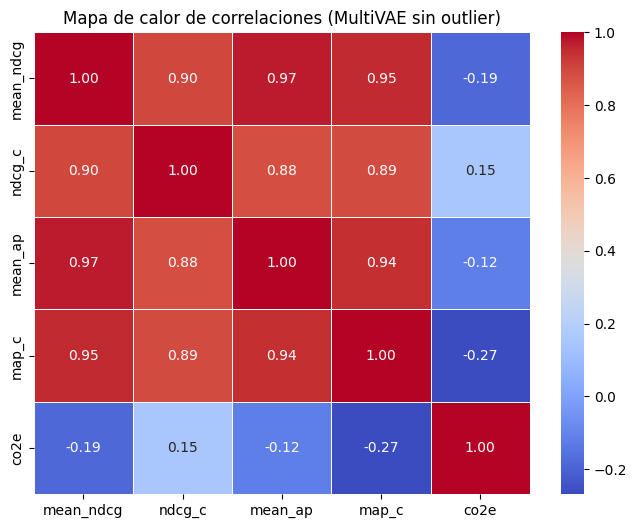

In [ ]:

corr_df_filtered = df_filtered[['mean_ndcg', 'ndcg_c', 'mean_ap', 'map_c', 'co2e']]
correlation_matrix_filtered = corr_df_filtered.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_filtered,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5
)
plt.title('Mapa de calor de correlaciones (MultiVAE sin outlier)')
plt.show()


#### ndcg-c vs map-c sin outlier

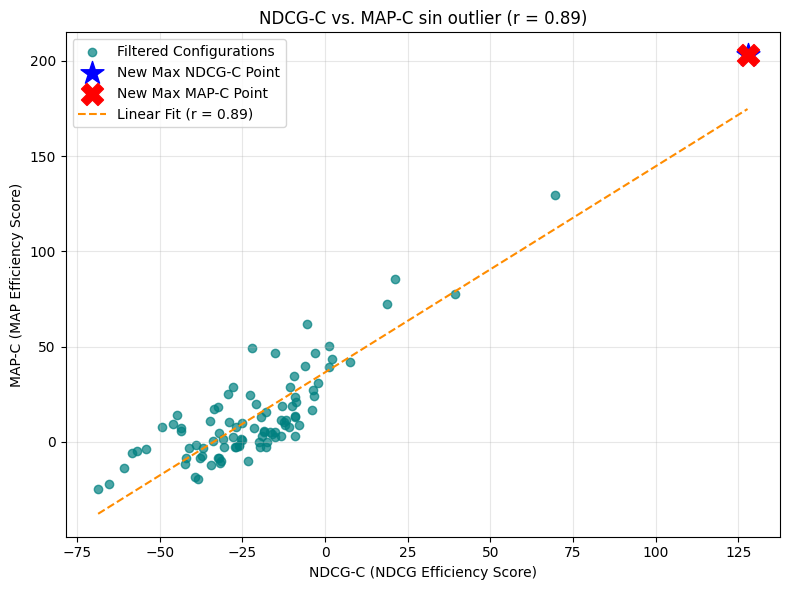

In [ ]:

plt.figure(figsize=(8, 6))

plt.scatter(
    df_filtered['ndcg_c'],
    df_filtered['map_c'],
    color='teal',
    alpha=0.7,
    label='Filtered Configurations'
)

plt.scatter(
    multivae_best_ndcg_c_filtered['ndcg_c'],
    multivae_best_ndcg_c_filtered['map_c'],
    color='blue',
    marker='*',
    s=300,
    zorder=5,
    label='New Max NDCG-C Point'
)

plt.scatter(
    multivae_best_map_c_filtered['ndcg_c'],
    multivae_best_map_c_filtered['map_c'],
    color='red',
    marker='X',
    s=250,
    zorder=5,
    label='New Max MAP-C Point'
)


m_f, b_f = np.polyfit(df_filtered['ndcg_c'], df_filtered['map_c'], 1)
x_fit_f = np.linspace(df_filtered['ndcg_c'].min(), df_filtered['ndcg_c'].max(), 100)

plt.plot(
    x_fit_f,
    m_f * x_fit_f + b_f,
    color='darkorange',
    linestyle='--',
    label=f'Linear Fit (r = {ndcg_map_c_correlation_f:.2f})'
)

plt.xlabel("NDCG-C (NDCG Efficiency Score)")
plt.ylabel("MAP-C (MAP Efficiency Score)")
plt.title(f"NDCG-C vs. MAP-C sin outlier (r = {ndcg_map_c_correlation_f:.2f})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Eliminando los outliers se observa que si existe una correlación muy positiva entre las métricas y las eficiencias. Esto nos da evidencia de que la métrica podría ser redunante, ya que si el objetivo es máximizar la métrica de eficiencia, entonces se podría buscar maximizar el valor de la métrica sin considerar el carbono y llegar a los mismos modelos o modelos similares en producción de carbono.

Sin embargo, esta correlación, al menos para MultiVae, nos deja ver que encontrar las mayores mejoras en rendimiento del modelo según las métricas se hacen con configuraciones eficientes en términos de emisiones de carbono, sin considerar modelos que consiguen mejoras marginales en las métricas baseline.

Además, la baja correlación de las métricas con el CO2e nos deja ver que la métrica en su mayor parte está dominada por los valores de performance de recomendación, es decir, la métrica no favorece en su mayoría a modelos que producen menos co2 y que tienen peores métricas. Sin embargo, esto es considerando casos donde el co2e no es cercano a 0, como pasa con el outlier, donde se observa que resultados marginalmente mejores que random pueden dar eficiencias muy altas por el denominador cercano a 0.

### NDCG

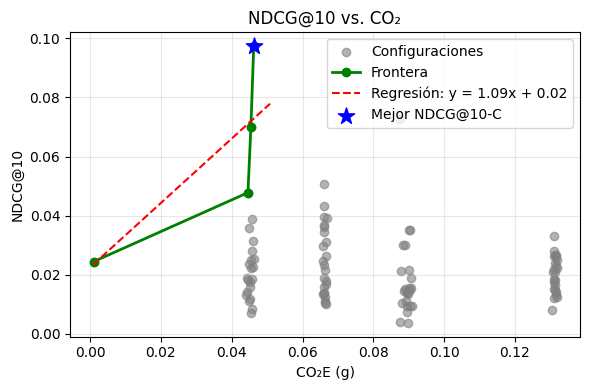

NDCG Frontier Linear Regression:
Slope (m): 1.0893
Intercept (b): 0.0225


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in multivae_results_dict],
    [r['mean_ndcg'] for r in multivae_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in multivae_ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in multivae_ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)


m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')

plt.scatter(
    multivae_best_ndcg_c['co2e'],
    multivae_best_ndcg_c['mean_ndcg'],
    color='blue', marker='*', s=150, zorder=5, label='Mejor NDCG@10-C'
)


plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("NDCG@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("NDCG Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

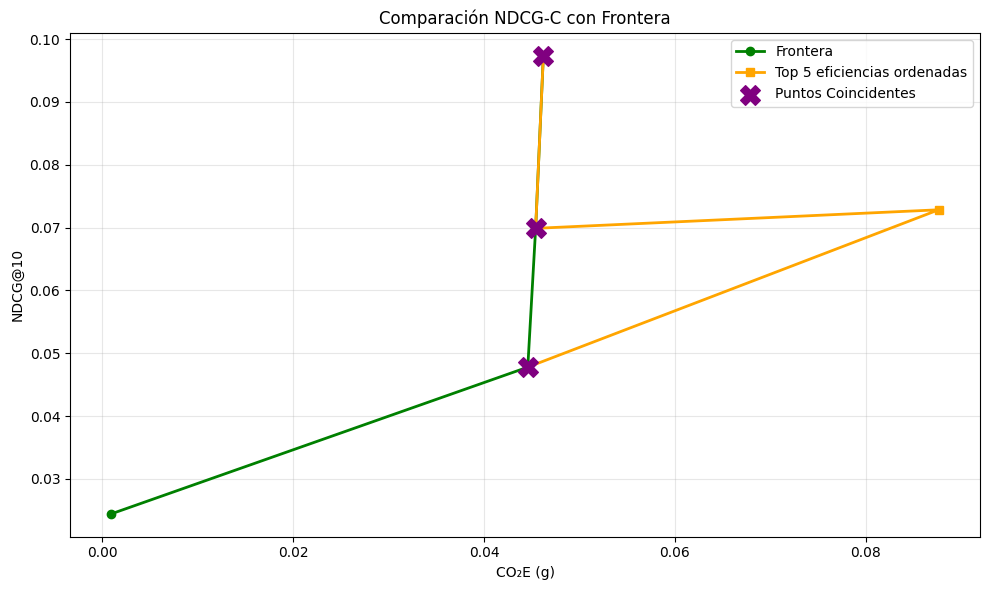

In [ ]:
plt.figure(figsize=(10,6))

co2e_ndcg = [r['co2e'] for r in multivae_ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in multivae_ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)

frontier_len = len(multivae_ndcg_frontier)

plt.plot(
    [r["co2e"] for r in multivae_ordered_ndcg_c][:frontier_len],
    [r["mean_ndcg"] for r in multivae_ordered_ndcg_c][:frontier_len],
    color='orange', marker='s', linewidth=2, label='Top 5 eficiencias ordenadas'
)

frontier_points_set = set((r['co2e'], r['mean_ndcg']) for r in multivae_ndcg_frontier)
ordered_efficiency_points_set = set((r['co2e'], r['mean_ndcg']) for r in multivae_ordered_ndcg_c[:5])

coincident_points = frontier_points_set.intersection(ordered_efficiency_points_set)

if coincident_points:
    coincident_co2e = [p[0] for p in coincident_points]
    coincident_mean_ndcg = [p[1] for p in coincident_points]
    plt.scatter(coincident_co2e, coincident_mean_ndcg, color='purple', marker='X', s=200, zorder=6, label='Puntos Coincidentes')

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("Comparación NDCG-C con Frontera")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### MAP

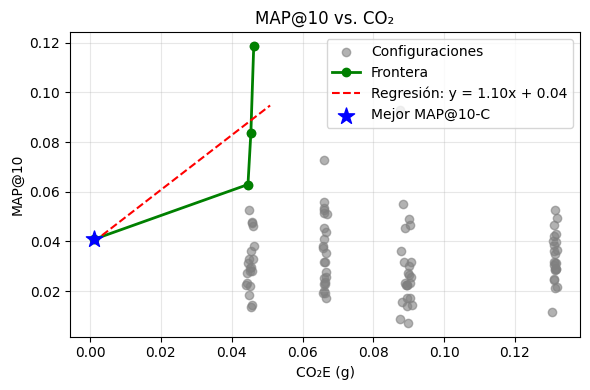

MAP Frontier Linear Regression:
Slope (m): 1.1017
Intercept (b): 0.0387


In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in multivae_results_dict],
    [r['mean_ap'] for r in multivae_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in multivae_map_frontier]
mean_ndcg_ndcg = [r['mean_ap'] for r in multivae_map_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)


m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')

plt.scatter(
    multivae_best_map_c['co2e'],
    multivae_best_map_c['mean_ap'],
    color='blue', marker='*', s=150, zorder=5, label='Mejor MAP@10-C'
)

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("MAP@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("MAP Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

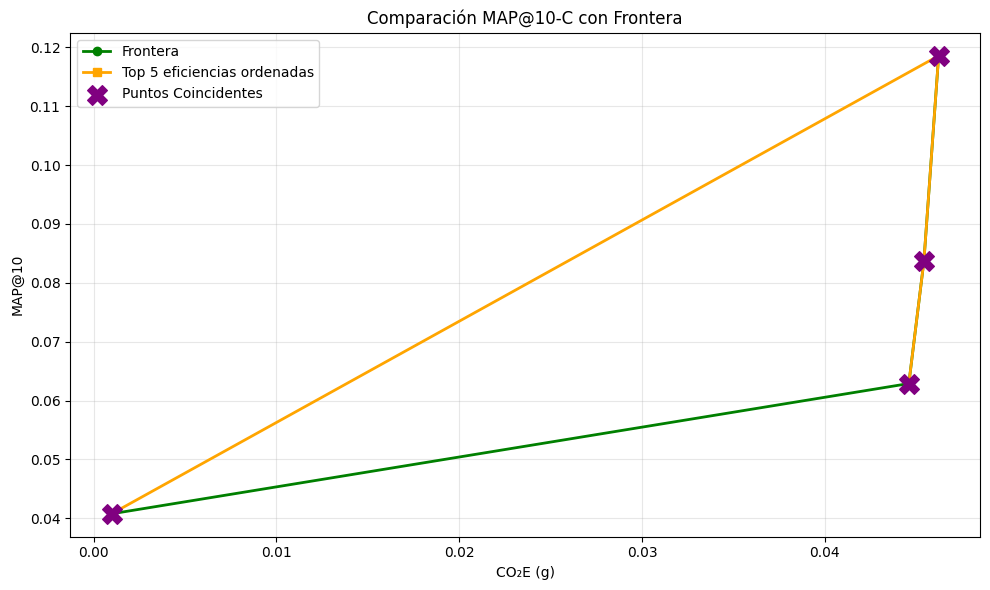

In [ ]:
plt.figure(figsize=(10,6))

co2e_ndcg = [r['co2e'] for r in multivae_map_frontier]
mean_ndcg_ndcg = [r['mean_ap'] for r in multivae_map_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)


frontier_len = len(multivae_map_frontier)


plt.plot(
    [r["co2e"] for r in multivae_ordered_map_c][:frontier_len],
    [r["mean_ap"] for r in multivae_ordered_map_c][:frontier_len],
    color='orange', marker='s', linewidth=2, label='Top 5 eficiencias ordenadas'
)


frontier_points_set = set((r['co2e'], r['mean_ap']) for r in multivae_map_frontier)
ordered_efficiency_points_set = set((r['co2e'], r['mean_ap']) for r in multivae_ordered_map_c[:5])

coincident_points = frontier_points_set.intersection(ordered_efficiency_points_set)

if coincident_points:
    coincident_co2e = [p[0] for p in coincident_points]
    coincident_mean_ndcg = [p[1] for p in coincident_points]
    plt.scatter(coincident_co2e, coincident_mean_ndcg, color='purple', marker='X', s=200, zorder=6, label='Puntos Coincidentes')

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("Comparación MAP@10-C con Frontera")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Se observa que la mayoría de las mejroes eficiencias caen en la frontera pareto entre las métricas y las emisiones de co2e. Esto con las correlaciones positivas nos deja ver que la métrica puede cumplir un rol de validación de la sostenibilidad de las mejores configuraciones.

## ALS Bookcrossing


In [4]:
als_results_df = pd.read_csv('als_model_results_books.csv')
als_results_dict = als_results_df.to_dict('records')

In [5]:
als_best_results = filter_for_efficiency_in_each_metric(als_results_dict)
als_map_frontier = pareto_filter(als_results_dict, 'mean_ap')
als_ndcg_frontier = pareto_filter(als_results_dict, 'mean_ndcg')

In [16]:
als_map_frontier.sort(key=lambda x: x['mean_ap'])
als_ndcg_frontier.sort(key=lambda x: x['mean_ndcg'])
print([(result["mean_ap"], result["co2e"], result['factors'], result['regularization']) for result in als_map_frontier])
print([(result["mean_ndcg"], result["co2e"], result['factors'], result['regularization']) for result in als_ndcg_frontier])

[(0.0155783664372261, 0.0018503138832747, 30, 0.001), (0.0156255248731722, 0.0020247042874495, 30, 0.01), (0.0160636716197671, 0.0030445473281045, 50, 0.1), (0.0161696663877746, 0.0030608071225384, 50, 0.001), (0.0164911950042855, 0.003120994998763, 50, 0.01), (0.0181389307723494, 0.0055288685113191, 100, 0.1), (0.0182204684010746, 0.0060330482386052, 100, 0.001), (0.0184174130505032, 0.0060980817489326, 100, 0.01), (0.0190309197466082, 0.0096643551004429, 150, 0.01), (0.0193798760008409, 0.0162566136009991, 200, 0.1), (0.0201138868390463, 0.0179148887706299, 200, 0.01)]
[(0.0215774757112611, 0.0018503138832747, 30, 0.001), (0.0216477456323209, 0.0020247042874495, 30, 0.01), (0.0223122033894662, 0.0030445473281045, 50, 0.1), (0.02249981907145, 0.0030608071225384, 50, 0.001), (0.0227346749776137, 0.003120994998763, 50, 0.01), (0.0245302304963104, 0.0055288685113191, 100, 0.1), (0.0246950811583996, 0.0060330482386052, 100, 0.001), (0.024978406398816, 0.0060980817489326, 100, 0.01), (0.02

In [7]:
als_best_ndcg_c = als_best_results['best_ndcg_c']
als_best_map_c = als_best_results['best_map_c']
print("Best NDCG-C model.", f"ndcg-c: {als_best_ndcg_c['ndcg_c']}, factors: {als_best_ndcg_c['factors']}, regularization: {als_best_ndcg_c['regularization']}")
print("Best MAP-C model.", f"map-c: {als_best_map_c['map_c']}, factors: {als_best_map_c['factors']}, regularization: {als_best_map_c['regularization']}")


Best NDCG-C model. ndcg-c: 1162.8503217751252, factors: 30, regularization: 0.001
Best MAP-C model. map-c: 839.8800268416059, factors: 30, regularization: 0.001


In [8]:
als_max_ndcg_config = als_results_df.loc[als_results_df['mean_ndcg'].idxmax()].to_dict()

als_max_map_config = als_results_df.loc[als_results_df['mean_ap'].idxmax()].to_dict()

als_ordered_ndcg_c = sorted(als_results_dict, key=lambda x: x['ndcg_c'], reverse=True)
als_ordered_map_c = sorted(als_results_dict, key=lambda x: x['map_c'], reverse=True)

print( f"NDCG: {als_max_ndcg_config['mean_ndcg']:.4f}, Factors: {als_max_ndcg_config['factors']}, Reg: {als_max_ndcg_config['regularization']}")
print(f"MAP: {als_max_map_config['mean_ap']:.4f}, Factors: {als_max_map_config['factors']}, Reg: {als_max_map_config['regularization']}")

NDCG: 0.0265, Factors: 200.0, Reg: 0.01
MAP: 0.0201, Factors: 200.0, Reg: 0.01


In [9]:
als_ndcg_correlation = als_results_df['mean_ndcg'].corr(als_results_df['ndcg_c'])
als_map_correlation = als_results_df['mean_ap'].corr(als_results_df['map_c'])

als_co2e_ndcg_correlation = als_results_df['co2e'].corr(als_results_df['ndcg_c'])
als_co2e_map_correlation = als_results_df['co2e'].corr(als_results_df['map_c'])

als_ndcg_map_c_correlation = als_results_df['ndcg_c'].corr(als_results_df['map_c'])


print(f"Correlation (NDCG vs NDCG-C): {als_ndcg_correlation:.4f}")
print(f"Correlation (CO2e vs NDCG-C): {als_co2e_ndcg_correlation:.4f}")
print(f"Correlation (MAP vs MAP-C): {als_map_correlation:.4f}")
print(f"Correlation (CO2e vs MAP-C): {als_co2e_map_correlation:.4f}")
print(f"Correlation (NDCG-C vs MAP-C): {als_ndcg_map_c_correlation:.4f}")


Correlation (NDCG vs NDCG-C): -0.9730
Correlation (CO2e vs NDCG-C): -0.8622
Correlation (MAP vs MAP-C): -0.9656
Correlation (CO2e vs MAP-C): -0.8636
Correlation (NDCG-C vs MAP-C): 1.0000


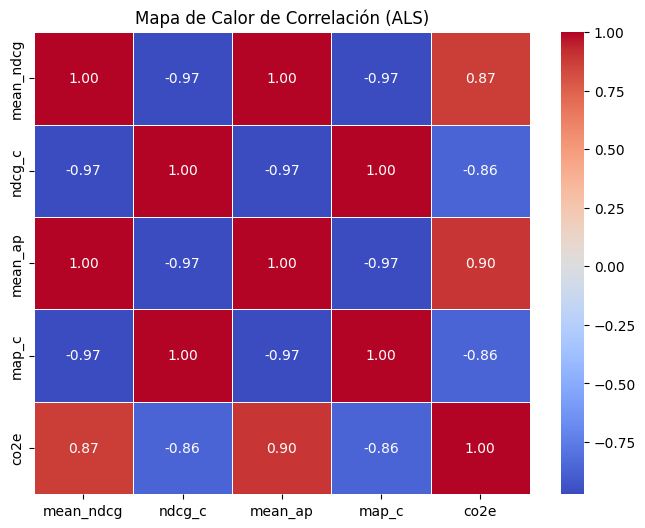

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_df_als = als_results_df[['mean_ndcg', 'ndcg_c', 'mean_ap', 'map_c', 'co2e']]
correlation_matrix_als = corr_df_als.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_als,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True,
    linewidths=.5
)
plt.title('Mapa de Calor de Correlación (ALS)')
plt.show()

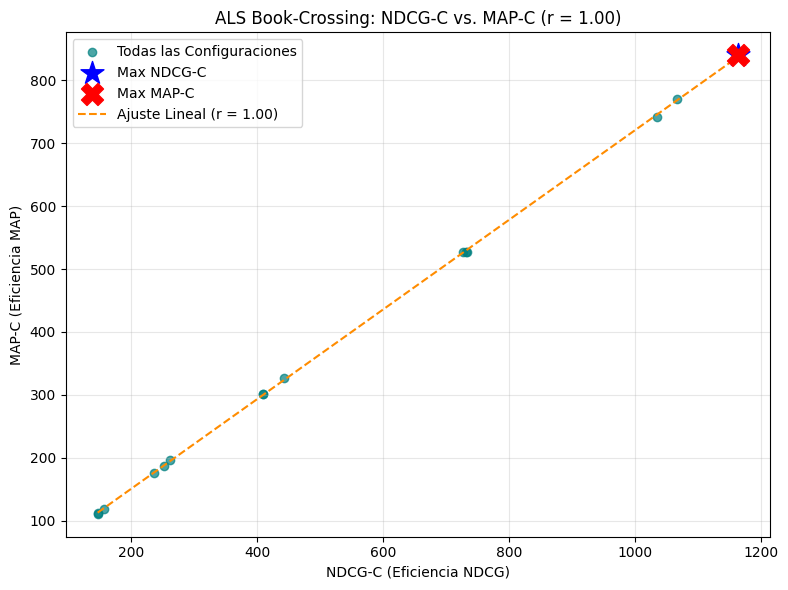

In [11]:
import numpy as np


plt.figure(figsize=(8, 6))

plt.scatter(
    als_results_df['ndcg_c'],
    als_results_df['map_c'],
    color='teal',
    alpha=0.7,
    label='Todas las Configuraciones'
)

plt.scatter(
    als_best_ndcg_c['ndcg_c'],
    als_best_ndcg_c['map_c'],
    color='blue',
    marker='*',
    s=300,
    zorder=5,
    label='Max NDCG-C'
)

plt.scatter(
    als_best_map_c['ndcg_c'],
    als_best_map_c['map_c'],
    color='red',
    marker='X',
    s=250,
    zorder=5,
    label='Max MAP-C'
)


r_als = als_results_df['ndcg_c'].corr(als_results_df['map_c'])
m_als, b_als = np.polyfit(als_results_df['ndcg_c'], als_results_df['map_c'], 1)
x_fit_als = np.linspace(als_results_df['ndcg_c'].min(), als_results_df['ndcg_c'].max(), 100)

plt.plot(
    x_fit_als,
    m_als * x_fit_als + b_als,
    color='darkorange',
    linestyle='--',
    label=f'Ajuste Lineal (r = {r_als:.2f})'
)

plt.xlabel("NDCG-C (Eficiencia NDCG)")
plt.ylabel("MAP-C (Eficiencia MAP)")
plt.title(f"ALS Book-Crossing: NDCG-C vs. MAP-C (r = {r_als:.2f})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### NDCG

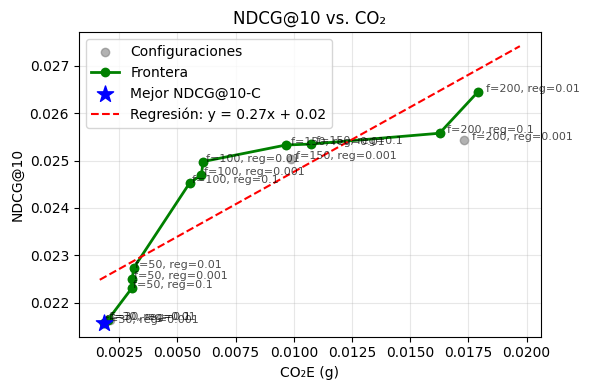

NDCG Frontier Linear Regression:
Slope (m): 0.2730
Intercept (b): 0.0220


In [12]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in als_results_dict],
    [r['mean_ndcg'] for r in als_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in als_ndcg_frontier]
mean_ndcg_ndcg = [r['mean_ndcg'] for r in als_ndcg_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)

plt.scatter(
    als_best_ndcg_c['co2e'],
    als_best_ndcg_c['mean_ndcg'],
    color='blue', marker='*', s=150, zorder=5, label='Mejor NDCG@10-C'
)

m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')


for r in als_results_dict:
    label = f"f={r['factors']}, reg={r['regularization']}"
    plt.text(r['co2e']*1.02, r['mean_ndcg'], label, fontsize=8, alpha=0.7)

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("NDCG@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("NDCG Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

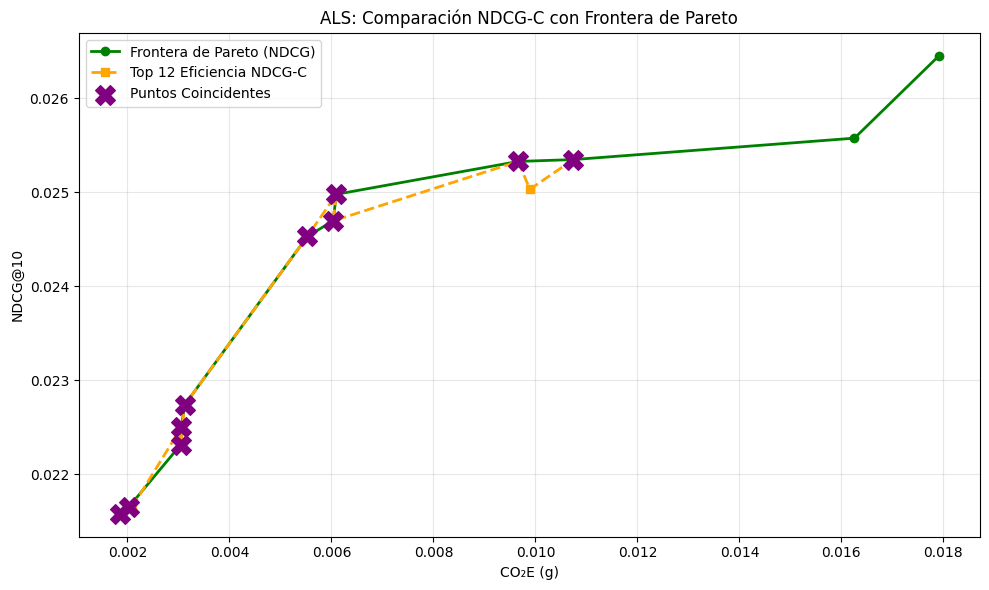

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

co2e_ndcg_als = [r['co2e'] for r in als_ndcg_frontier]
mean_ndcg_als = [r['mean_ndcg'] for r in als_ndcg_frontier]

plt.plot(
    co2e_ndcg_als,
    mean_ndcg_als,
    color='green', marker='o', linewidth=2, label='Frontera de Pareto (NDCG)'
)

frontier_len_als = len(als_ndcg_frontier)
num_points_to_show =  frontier_len_als

plt.plot(
    [r["co2e"] for r in als_ordered_ndcg_c][:num_points_to_show],
    [r["mean_ndcg"] for r in als_ordered_ndcg_c][:num_points_to_show],
    color='orange', marker='s', linewidth=2, linestyle='--', label=f'Top {num_points_to_show} Eficiencia NDCG-C'
)

frontier_points_set_als = set((r['co2e'], r['mean_ndcg']) for r in als_ndcg_frontier)
ordered_efficiency_points_set_als = set((r['co2e'], r['mean_ndcg']) for r in als_ordered_ndcg_c[:num_points_to_show])

coincident_points_als = frontier_points_set_als.intersection(ordered_efficiency_points_set_als)

if coincident_points_als:
    coincident_co2e_als = [p[0] for p in coincident_points_als]
    coincident_mean_ndcg_als = [p[1] for p in coincident_points_als]
    plt.scatter(coincident_co2e_als, coincident_mean_ndcg_als, color='purple', marker='X', s=200, zorder=6, label='Puntos Coincidentes')

plt.xlabel("CO₂E (g)")
plt.ylabel("NDCG@10")
plt.title("ALS: Comparación NDCG-C con Frontera de Pareto")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### MAP

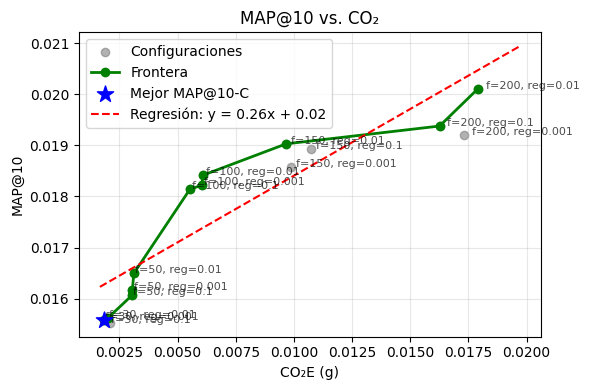

MAP Frontier Linear Regression:
Slope (m): 0.2614
Intercept (b): 0.0158


In [17]:
plt.figure(figsize=(6,4))
plt.scatter(
    [r['co2e'] for r in als_results_dict],
    [r['mean_ap'] for r in als_results_dict],
    color='gray', alpha=0.6, label='Configuraciones'
)

co2e_ndcg = [r['co2e'] for r in als_map_frontier]
mean_ndcg_ndcg = [r['mean_ap'] for r in als_map_frontier]

plt.plot(
    co2e_ndcg,
    mean_ndcg_ndcg,
    color='green', marker='o', linewidth=2, label='Frontera'
)

plt.scatter(
    als_best_map_c['co2e'],
    als_best_map_c['mean_ap'],
    color='blue', marker='*', s=150, zorder=5, label='Mejor MAP@10-C'
)

m_ndcg, b_ndcg = np.polyfit(co2e_ndcg, mean_ndcg_ndcg, 1)
x_range_ndcg = np.array([min(co2e_ndcg) * 0.9, max(co2e_ndcg) * 1.1])
plt.plot(x_range_ndcg, m_ndcg * x_range_ndcg + b_ndcg, color='red', linestyle='--', label=f'Regresión: y = {m_ndcg:.2f}x + {b_ndcg:.2f}')


for r in als_results_dict:
    label = f"f={r['factors']}, reg={r['regularization']}"
    plt.text(r['co2e']*1.02, r['mean_ap'], label, fontsize=8, alpha=0.7)

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("MAP@10 vs. CO₂")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("MAP Frontier Linear Regression:")
print(f"Slope (m): {m_ndcg:.4f}")
print(f"Intercept (b): {b_ndcg:.4f}")

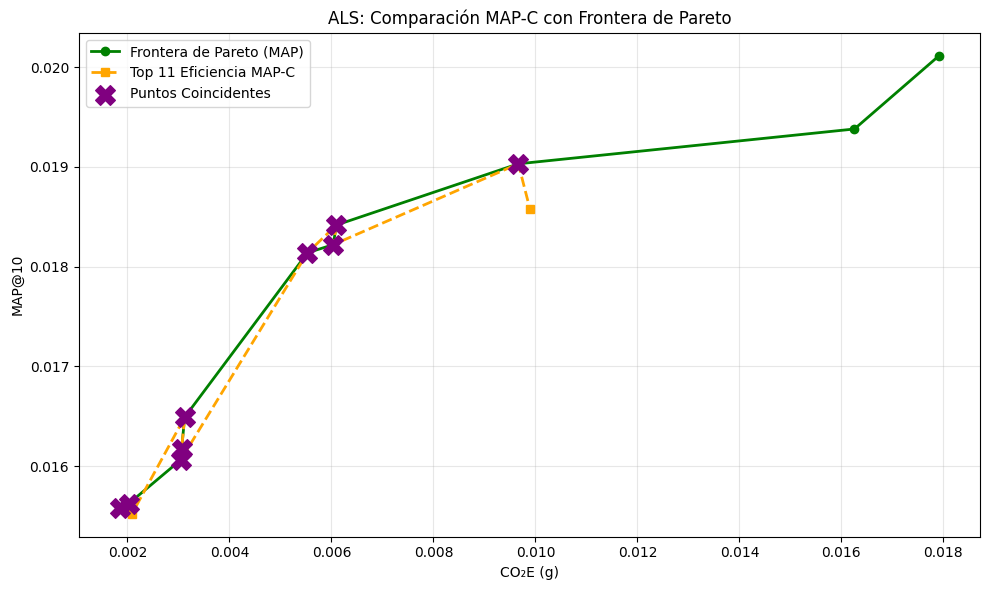

In [15]:

plt.figure(figsize=(10,6))

co2e_map_als = [r['co2e'] for r in als_map_frontier]
mean_map_als = [r['mean_ap'] for r in als_map_frontier]

plt.plot(
    co2e_map_als,
    mean_map_als,
    color='green', marker='o', linewidth=2, label='Frontera de Pareto (MAP)'
)

frontier_len_map_als = len(als_map_frontier)
num_points_to_show_map =  frontier_len_map_als

plt.plot(
    [r["co2e"] for r in als_ordered_map_c][:num_points_to_show_map],
    [r["mean_ap"] for r in als_ordered_map_c][:num_points_to_show_map],
    color='orange', marker='s', linewidth=2, linestyle='--', label=f'Top {num_points_to_show_map} Eficiencia MAP-C'
)

frontier_points_set_map_als = set((r['co2e'], r['mean_ap']) for r in als_map_frontier)
ordered_efficiency_points_set_map_als = set((r['co2e'], r['mean_ap']) for r in als_ordered_map_c[:num_points_to_show_map])

coincident_points_map_als = frontier_points_set_map_als.intersection(ordered_efficiency_points_set_map_als)

if coincident_points_map_als:
    coincident_co2e_map_als = [p[0] for p in coincident_points_map_als]
    coincident_mean_map_als = [p[1] for p in coincident_points_map_als]
    plt.scatter(coincident_co2e_map_als, coincident_mean_map_als, color='purple', marker='X', s=200, zorder=6, label='Puntos Coincidentes')

plt.xlabel("CO₂E (g)")
plt.ylabel("MAP@10")
plt.title("ALS: Comparación MAP-C con Frontera de Pareto")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Análisis

PAra el caso de als con bookcrossing las cosas cambian bastante. Ahora las correlaciones entre las métricas y sus eficiencias son negativas, y con el co2e es positiva. Esto quiere decir que, los modelos con mejores métricas tienden a producir más co2e y ser menos eficientes. Esto cambia el rol de las métricas de eficiencia de una herramienta de validación, como se veía con deepfm y multivae, a una que representa un tradeoff entre performance y costo ambiental, entregandole más relevancia, al menos en este contexto.